In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

from collections import Counter
from itertools import combinations
mlp.rcParams["figure.figsize"] = [18,8]

In [76]:
df = pd.read_excel("Software Vacancy.xlsx")
df.head()

,Unnamed: 0,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Posting Date,Deadline Date,Skills
0,0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,04.07.2024,18.07.2024,"['software development', 'programming', 'mobil..."
1,1,Senior Backend Developer,https://busy.az/vacancy/132086/senior-backend-...,Ferrum Capital,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['Oracle', 'T-SQL', 'OOP', 'back-end developme..."
2,2,Proqramlaşdırma İdarəsinin Tətbiqi proqramlaşd...,https://busy.az/vacancy/132034/proqramlasdirma...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['SQL', 'back-end development', 'programming',..."
3,3,Mid IOS Developer,https://busy.az/vacancy/132014/mid-ios-developer,Golden Pay,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['proqramlaşdırma', 'iOS development', 'progra..."
4,4,IOS Developer (middle),https://busy.az/vacancy/131978/ios-developer-m...,Express Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['OOP', 'proqramlaşdırma', 'iOS development', ..."


In [77]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Posting Date,Deadline Date,Skills
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,04.07.2024,18.07.2024,"['software development', 'programming', 'mobil..."
1,Senior Backend Developer,https://busy.az/vacancy/132086/senior-backend-...,Ferrum Capital,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['Oracle', 'T-SQL', 'OOP', 'back-end developme..."
2,Proqramlaşdırma İdarəsinin Tətbiqi proqramlaşd...,https://busy.az/vacancy/132034/proqramlasdirma...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['SQL', 'back-end development', 'programming',..."
3,Mid IOS Developer,https://busy.az/vacancy/132014/mid-ios-developer,Golden Pay,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['proqramlaşdırma', 'iOS development', 'progra..."
4,IOS Developer (middle),https://busy.az/vacancy/131978/ios-developer-m...,Express Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['OOP', 'proqramlaşdırma', 'iOS development', ..."


In [78]:
df.shape

(1796, 11)

In [79]:
df.isna().sum()

Name                     0
Url to Vacancy           0
Company                  0
Location               623
Type of Employment       0
Age category          1717
Education degree      1058
Salary                   0
Posting Date             8
Deadline Date            8
Skills                   0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                1796 non-null   object
 1   Url to Vacancy      1796 non-null   object
 2   Company             1796 non-null   object
 3   Location            1173 non-null   object
 4   Type of Employment  1796 non-null   object
 5   Age category        79 non-null     object
 6   Education degree    738 non-null    object
 7   Salary              1796 non-null   object
 8   Posting Date        1788 non-null   object
 9   Deadline Date       1788 non-null   object
 10  Skills              1796 non-null   object
dtypes: object(11)
memory usage: 154.5+ KB


In [81]:
df.duplicated().sum()

13

In [82]:
df[df.duplicated(keep=False)][:2]

,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Posting Date,Deadline Date,Skills
442,PHP Developer,https://busy.az/vacancy/98258/php-developer,Push30,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),Razılaşma yolu ilə,25.04.2023,25.05.2023,"['HTML', 'CSS', 'JavaScript', 'programming', '..."
443,PHP Developer,https://busy.az/vacancy/98258/php-developer,Push30,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),Razılaşma yolu ilə,25.04.2023,25.05.2023,"['HTML', 'CSS', 'JavaScript', 'programming', '..."


# Cleaning

In [83]:
df_clean = df.copy(deep=True)
df_clean.columns = df_clean.columns.str.replace(" ","_")
df_clean.head()

,Name,Url_to_Vacancy,Company,Location,Type_of_Employment,Age_category,Education_degree,Salary,Posting_Date,Deadline_Date,Skills
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,04.07.2024,18.07.2024,"['software development', 'programming', 'mobil..."
1,Senior Backend Developer,https://busy.az/vacancy/132086/senior-backend-...,Ferrum Capital,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['Oracle', 'T-SQL', 'OOP', 'back-end developme..."
2,Proqramlaşdırma İdarəsinin Tətbiqi proqramlaşd...,https://busy.az/vacancy/132034/proqramlasdirma...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['SQL', 'back-end development', 'programming',..."
3,Mid IOS Developer,https://busy.az/vacancy/132014/mid-ios-developer,Golden Pay,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['proqramlaşdırma', 'iOS development', 'progra..."
4,IOS Developer (middle),https://busy.az/vacancy/131978/ios-developer-m...,Express Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,03.07.2024,17.07.2024,"['OOP', 'proqramlaşdırma', 'iOS development', ..."


In [84]:
df_clean["Posting_Date"] = pd.to_datetime(df_clean["Posting_Date"], format="%d.%m.%Y")
df_clean["Deadline_Date"] = pd.to_datetime(df_clean["Deadline_Date"], format="%d.%m.%Y")

In [85]:
df_clean['Month'] = df_clean['Posting_Date'].dt.month
df_clean['Year'] = df_clean['Posting_Date'].dt.year

In [86]:
df_clean['Location'].value_counts()

Location
Bakı                                                                                                                                                                                                                                                             1158
Abşeron rayonu/Xırdalan                                                                                                                                                                                                                                             5
Sumqayıt                                                                                                                                                                                                                                                            4
Göygöl                                                                                                                                                                                                       

In [87]:
df_clean['Education_degree'].value_counts()

Education_degree
Ali               524
Ali (bakalavr)    211
Ali (Magistr)       2
Elmlər doktoru      1
Name: count, dtype: int64

In [88]:
print("Totalunique company count", df_clean['Company'].nunique())
df_clean['Company'].value_counts()

Totalunique company count 379


Company
Kapital Bank           57
eManat                 43
Bank Respublika ASC    41
Ateshgah Sigorta       39
PASHA Bank             36
                       ..
Fizza Pay               1
POS.az                  1
Capital XR              1
Engineering company     1
Oilfield Company        1
Name: count, Length: 379, dtype: int64

In [89]:
df_clean['Type_of_Employment'].value_counts()

Type_of_Employment
Tam ştat (full time)          1783
Təcrübəçi (stajor, intern)      11
Layihə/Müvəqqəti                 2
Name: count, dtype: int64

In [90]:
df_clean['Salary'].value_counts().head(20)

Salary
Razılaşma yolu ilə    1520
1500 - 2000             26
1200 - 1500             16
2000 - 3000             15
2000 - 2500             10
1500 - 2500             10
3000 - 3500              9
1000 - 1500              9
800                      7
1500                     7
2500 - 3500              7
1000                     6
700 - 1100               6
400                      6
1500 - 3000              5
2500 - 3000              5
2000                     5
600 - 1000               5
1000 - 1200              4
2000 - 3500              4
Name: count, dtype: int64

In [91]:
replacement_dict = {
    "2000 - 2500":"2000 - 3000",
    "1000 - 1400":"1200 - 1500",
    "1000 - 1500":"1200 - 1500",
    "1500 - 2000":"1500 - 2500",
    "3000 - 3500":"2500 - 3500",
    "1300 - 1500":"1200 - 1500",
    "1500 - 3000":"2000 - 3000",
    "3500 - 4500":"2500 - 5000",
    "800 - 1800":"1500 - 2000",

    "2250":"2000 - 3000",
    "1300":"1200 - 1500",
    "1200":"1200 - 1500",
    "2000":"1500 - 2000",
    "1500":"1200 - 1500",
    "3000":"2000 - 3000",
    "800":"1200 - 1500",
    "600 - 800":"300-800",
    "500 - 800":"300-800",
    "500":"500 - 1200",

    "1000":"700 - 1100",
    "400":"300-800",
}
df_clean['Salary'].replace(replacement_dict,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6264\2563775389.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Salary'].replace(replacement_dict,inplace=True)


In [92]:
df_clean['Salary'].value_counts().head(20)

Salary
Razılaşma yolu ilə    1520
1200 - 1500             45
1500 - 2500             36
2000 - 3000             34
2500 - 3500             16
300-800                 14
700 - 1100              12
1500 - 2000              6
600 - 1000               5
2500 - 3000              5
1000 - 1200              4
2000 - 3500              4
800 - 1200               4
1200 - 1800              3
700 - 2500               3
800 - 1300               3
1000 - 3000              3
2000 - 4000              3
1500 - 1800              3
1000 - 2000              3
Name: count, dtype: int64

In [93]:
df_clean['Age_category'].value_counts()

Age_category
25  - 45    19
25  - 30    12
20  - 35    10
22  - 35     7
25  - 35     5
22  - 28     3
24  - 35     3
20  - 30     3
23  - 45     2
25  - 40     2
22  - 30     2
24           2
21  - 30     1
20  - 28     1
24  - 40     1
24  - 30     1
23  - 35     1
23  - 28     1
22  - 40     1
22  - 26     1
23  - 30     1
Name: count, dtype: int64

In [94]:
replacement_dict = {
    "20  - 30":"20  - 35",
    "20  - 28":"20  - 35",
    "21  - 30":"20  - 35",
    "22 - 35": "20  - 35",
    "22  - 28":"20  - 35",
    "22  - 30":"20  - 35",
    "22  - 35":"20  - 35",
    "22  - 26":"20  - 35",
    "23  - 30":"20  - 35",
    "23  - 28":"20  - 35",
    "23  - 35":"20  - 35",
    "24  - 35":"20  - 35",
    "25 - 30": "20  - 35",
    "25  - 35":"20  - 35",
    "24" : "20  - 35",

    "22  - 40":"25  - 45",
    "23  - 45":"25  - 45",
    "24  - 30":"25  - 30",
    "24  - 40":"25  - 45",
    "25  - 40":"25  - 45",
}

df_clean['Age_category'].replace(replacement_dict,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6264\4209940388.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age_category'].replace(replacement_dict,inplace=True)


In [95]:
df_clean['Education_degree']  = df_clean['Education_degree'].replace("Ali (Magistr)","Ali")

In [96]:
df_clean['Location'] = df_clean['Location'].str.replace('\n', '', regex=False).replace('\t', '', regex=False).replace(r'\s+', '', regex=True)
df_clean['Location'].value_counts()

Location
Bakı                          1158
Abşeronrayonu/Xırdalan           5
Sumqayıt                         4
Göygöl                           1
QubaXaçmaz                       1
BakıAbşeronrayonu/Xırdalan       1
Gəncə                            1
Balakən                          1
HacıqabulŞirvan                  1
Name: count, dtype: int64

In [97]:
df_clean['Skills'] = df_clean['Skills'].str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace("'", '', regex=False)
df_clean

,Name,Url_to_Vacancy,Company,Location,Type_of_Employment,Age_category,Education_degree,Salary,Posting_Date,Deadline_Date,Skills,Month,Year
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2024-07-04,2024-07-18,"software development, programming, mobile appl...",7.0,2024.0
1,Senior Backend Developer,https://busy.az/vacancy/132086/senior-backend-...,Ferrum Capital,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2024-07-03,2024-07-17,"Oracle, T-SQL, OOP, back-end development, soft...",7.0,2024.0
2,Proqramlaşdırma İdarəsinin Tətbiqi proqramlaşd...,https://busy.az/vacancy/132034/proqramlasdirma...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2024-07-03,2024-07-17,"SQL, back-end development, programming, proqra...",7.0,2024.0
3,Mid IOS Developer,https://busy.az/vacancy/132014/mid-ios-developer,Golden Pay,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2024-07-03,2024-07-17,"proqramlaşdırma, iOS development, programming,...",7.0,2024.0
4,IOS Developer (middle),https://busy.az/vacancy/131978/ios-developer-m...,Express Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2024-07-03,2024-07-17,"OOP, proqramlaşdırma, iOS development, softwar...",7.0,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,Software Developer,https://busy.az/vacancy/6883/software-developer,Komtec Ltd,NaN,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2012-07-07,2012-08-06,"proqramçı, programmer, software developer",7.0,2012.0
1792,Java Developer,https://busy.az/vacancy/6741/java-developer,Komtec Ltd,NaN,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2012-06-16,2012-07-16,"JavaScript, proqramlaşdırma, programming, soft...",6.0,2012.0
1793,Software Developer,https://busy.az/vacancy/6589/software-developer,Komtec Ltd,NaN,Tam ştat (full time),NaN,Ali (bakalavr),Razılaşma yolu ilə,2012-05-24,2012-06-23,"software development, proqramlaşdırma, program...",5.0,2012.0
1794,Process/Production Engineer,https://busy.az/vacancy/6010/processproduction...,Caspian Investment and Development Corporation...,NaN,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2012-03-05,2012-04-04,"web developer, software developer",3.0,2012.0


In [98]:
def fill_na_with_mode(col_name):
    mode = df_clean[col_name].mode()[0]
    df_clean[col_name].fillna(mode,inplace=True)

In [99]:
fill_na_with_mode("Location")
df_clean.isna().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6264\2947110197.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col_name].fillna(mode,inplace=True)


Name                     0
Url_to_Vacancy           0
Company                  0
Location                 0
Type_of_Employment       0
Age_category          1717
Education_degree      1058
Salary                   0
Posting_Date             8
Deadline_Date            8
Skills                   0
Month                    8
Year                     8
dtype: int64

In [100]:
df_extended = df_clean.copy(deep=True)

df_extended['Skills'] = df_clean['Skills'].str.split(', ').apply(lambda x: [item.strip() for item in x]) ## separate each word in skills
df_extended = df_extended.explode('Skills') # Transform each element of a list-like to a row, replicating index values.

df_extended

,Name,Url_to_Vacancy,Company,Location,Type_of_Employment,Age_category,Education_degree,Salary,Posting_Date,Deadline_Date,Skills,Month,Year
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2024-07-04,2024-07-18,software development,7.0,2024.0
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2024-07-04,2024-07-18,programming,7.0,2024.0
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2024-07-04,2024-07-18,mobile application,7.0,2024.0
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2024-07-04,2024-07-18,mobile development,7.0,2024.0
0,Mobil tətbiq üzrə məhsul mütəxəssisi,https://busy.az/vacancy/132205/mobil-tetbiq-uz...,189 Taxi,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2024-07-04,2024-07-18,mobile application development,7.0,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,Process/Production Engineer,https://busy.az/vacancy/6010/processproduction...,Caspian Investment and Development Corporation...,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2012-03-05,2012-04-04,software developer,3.0,2012.0
1795,Information and Communication Technology Assis...,https://busy.az/vacancy/6006/information-and-c...,Oilfield Company,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),600 - 900,2012-03-05,2012-04-04,jQuery,3.0,2012.0
1795,Information and Communication Technology Assis...,https://busy.az/vacancy/6006/information-and-c...,Oilfield Company,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),600 - 900,2012-03-05,2012-04-04,Microsoft Office,3.0,2012.0
1795,Information and Communication Technology Assis...,https://busy.az/vacancy/6006/information-and-c...,Oilfield Company,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),600 - 900,2012-03-05,2012-04-04,Microsoft Excel,3.0,2012.0


In [101]:
skills_to_remove = ["proqram təminatı","proqramlaşdırma","programming","proqramçı","programmer","программирование","software development"]
grouped_skills = df_clean.groupby(df_clean.index)['Skills'].apply(lambda x: ', '.join(x).split(', ')).reset_index(drop=True)

pair_ctr = Counter()

for skills in grouped_skills:
    filtered_skills = [skill for skill in skills if skill not in skills_to_remove]
    if len(filtered_skills) > 1:  
        pair_ctr.update(combinations(sorted(filtered_skills), 3))

pair_skill_df = pd.DataFrame(pair_ctr.most_common(10),columns=["Skills","Count"])
pair_skill_df.set_index("Count",inplace=True)

pair_skill_df

,Skills
Count,
181,"(CSS, HTML, JavaScript)"
95,"(CSS, HTML, front-end development)"
78,"(mobile application, mobile application develo..."
75,"(CSS, JavaScript, front-end development)"
74,"(CSS, HTML, jQuery)"
70,"(HTML, JavaScript, front-end development)"
68,"(HTML, JavaScript, jQuery)"
63,"(CSS, JavaScript, jQuery)"
57,"(Android development, mobile application, mobi..."


# Visualization

In [102]:
my_palatte = ["#FFA38F","#E9FF97","#FFD18E","#FF7EE2","#9CDBA6","#50B498","#468585","#5A639C","#E2BBE9"]

In [116]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# ---------------------------------------------------
def show_piechart(data,column,fig_size = (10,8)):
    data_col = data[column].value_counts()

    plt.figure(figsize=fig_size)
    plt.pie(x=data_col.values, labels=data_col.index, autopct='%1.1f%%',colors=my_palatte)
    plt.title(f'Distribution of {column.replace("_"," ")}')
    plt.show()


# ------------------------------------------------------
def show_countplot(data, column,top_n = 0):
    top_n = data[column].nunique() if top_n == 0 else top_n
    data_col = data[column].value_counts().head(top_n)
    print(top_n)

    addlabels(data_col.index,data_col.values)
    sns.countplot(x=data[column], order=data_col.index, hue=data[column],palette="pastel")
    plt.title(f'Distribution of {column.replace("_"," ")}')

    plt.show()
    
# ------------------------------------------------------
def show_plot(data,x,y):
    plt.plot(data[x], data[y], marker='o', linestyle='-')
    plt.xlabel(x)
    plt.show()

    

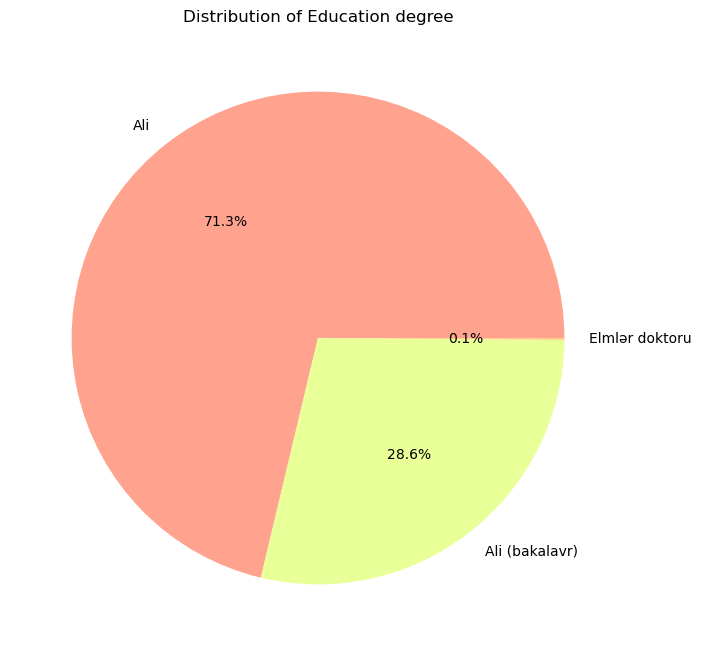

In [104]:
show_piechart(df_clean,"Education_degree")

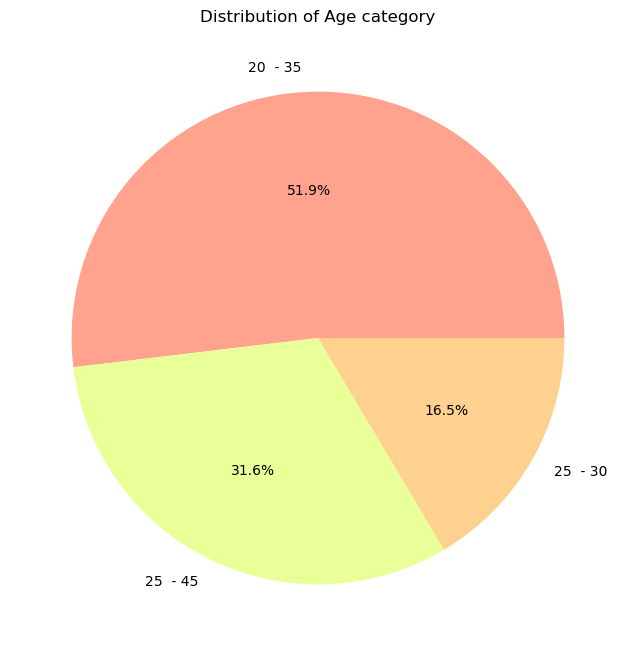

In [105]:
show_piechart(df_clean,"Age_category")

9


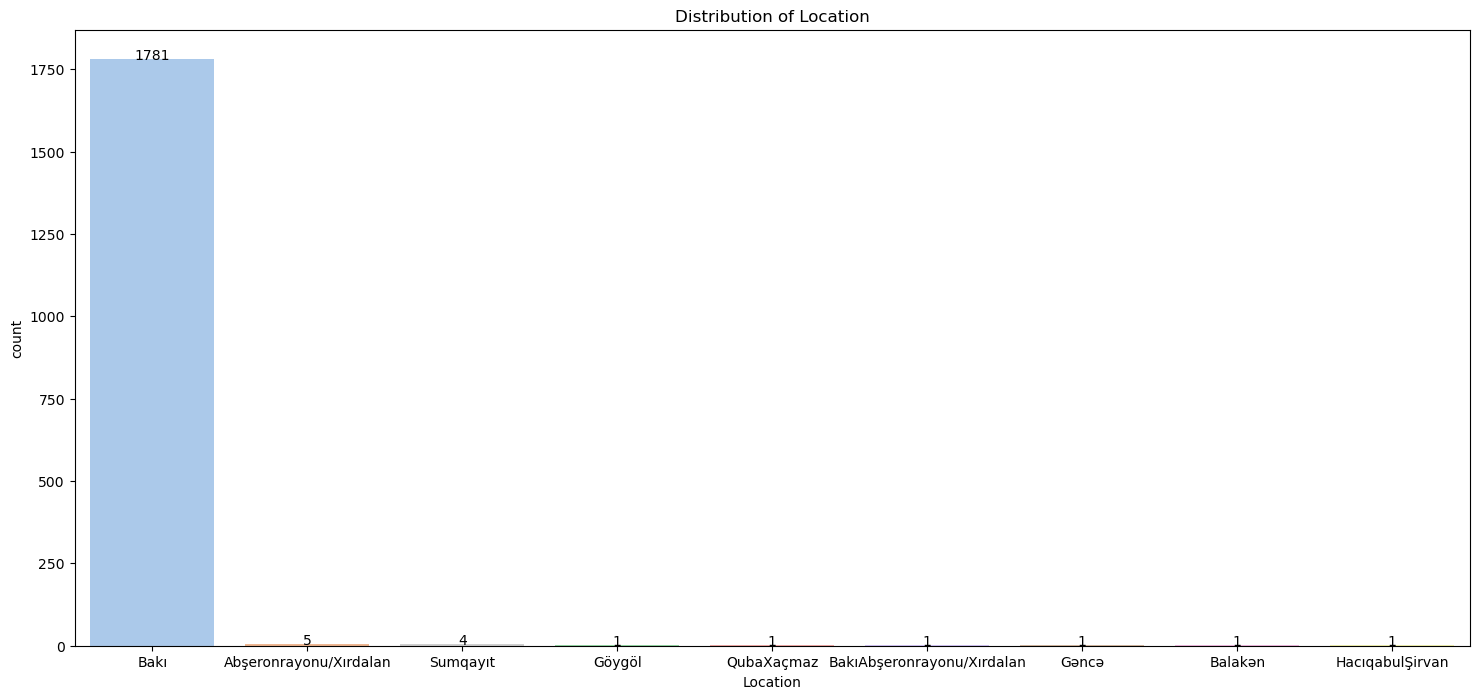

In [106]:
show_countplot(df_clean,"Location")

3


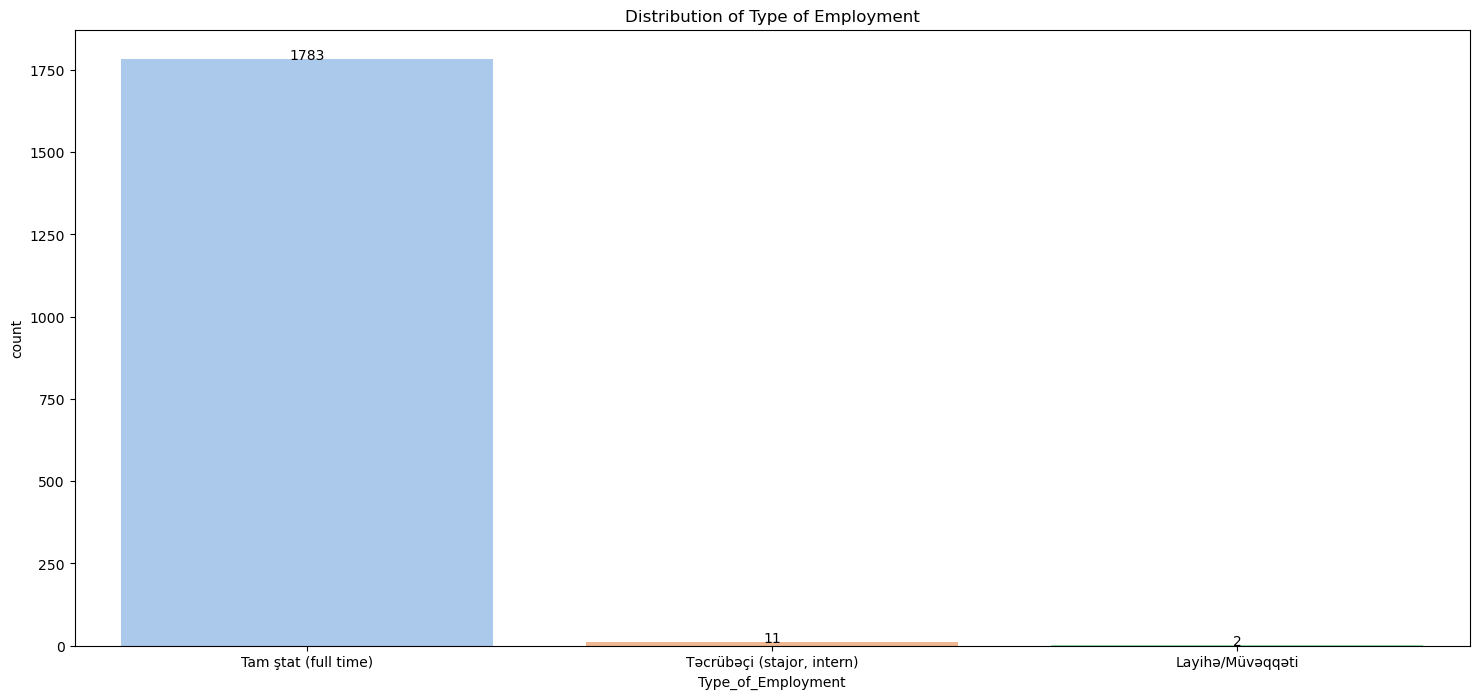

In [107]:
show_countplot(df_clean,"Type_of_Employment")

10


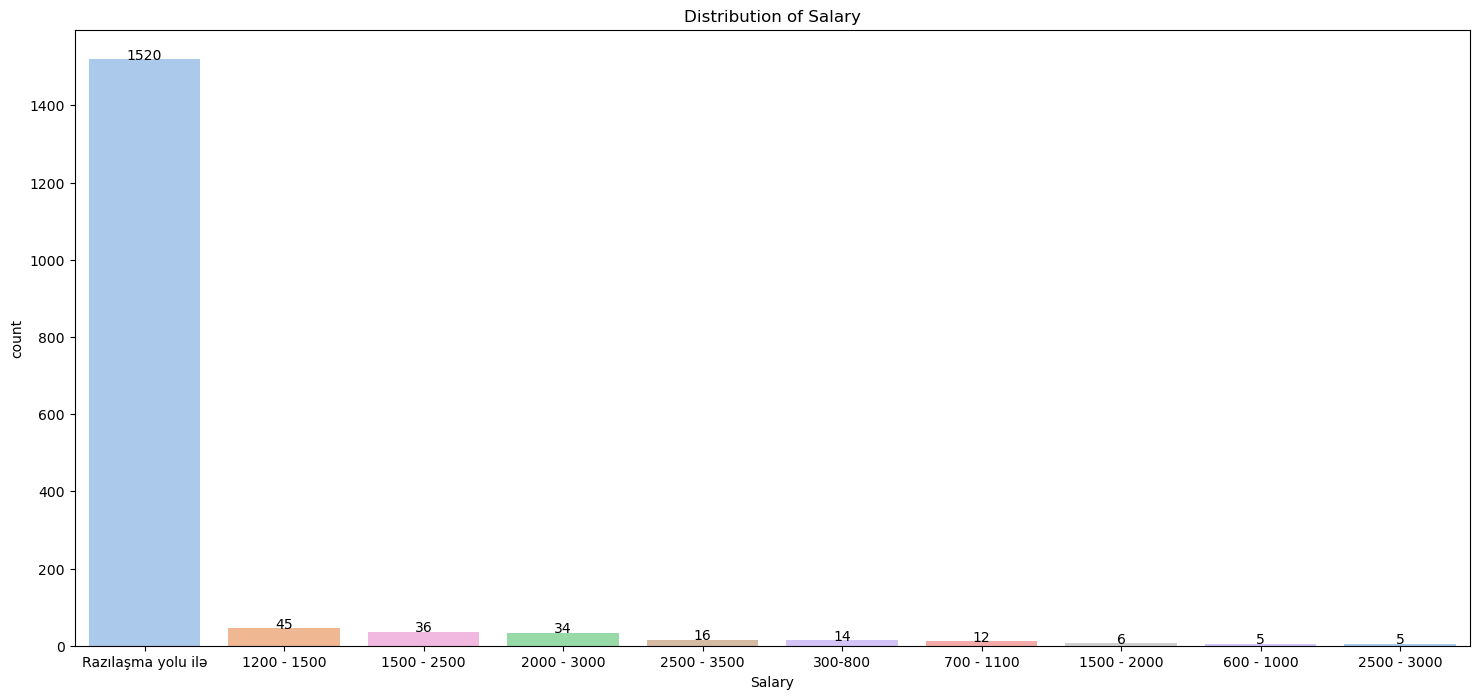

In [108]:
show_countplot(df_clean,"Salary",10)

10


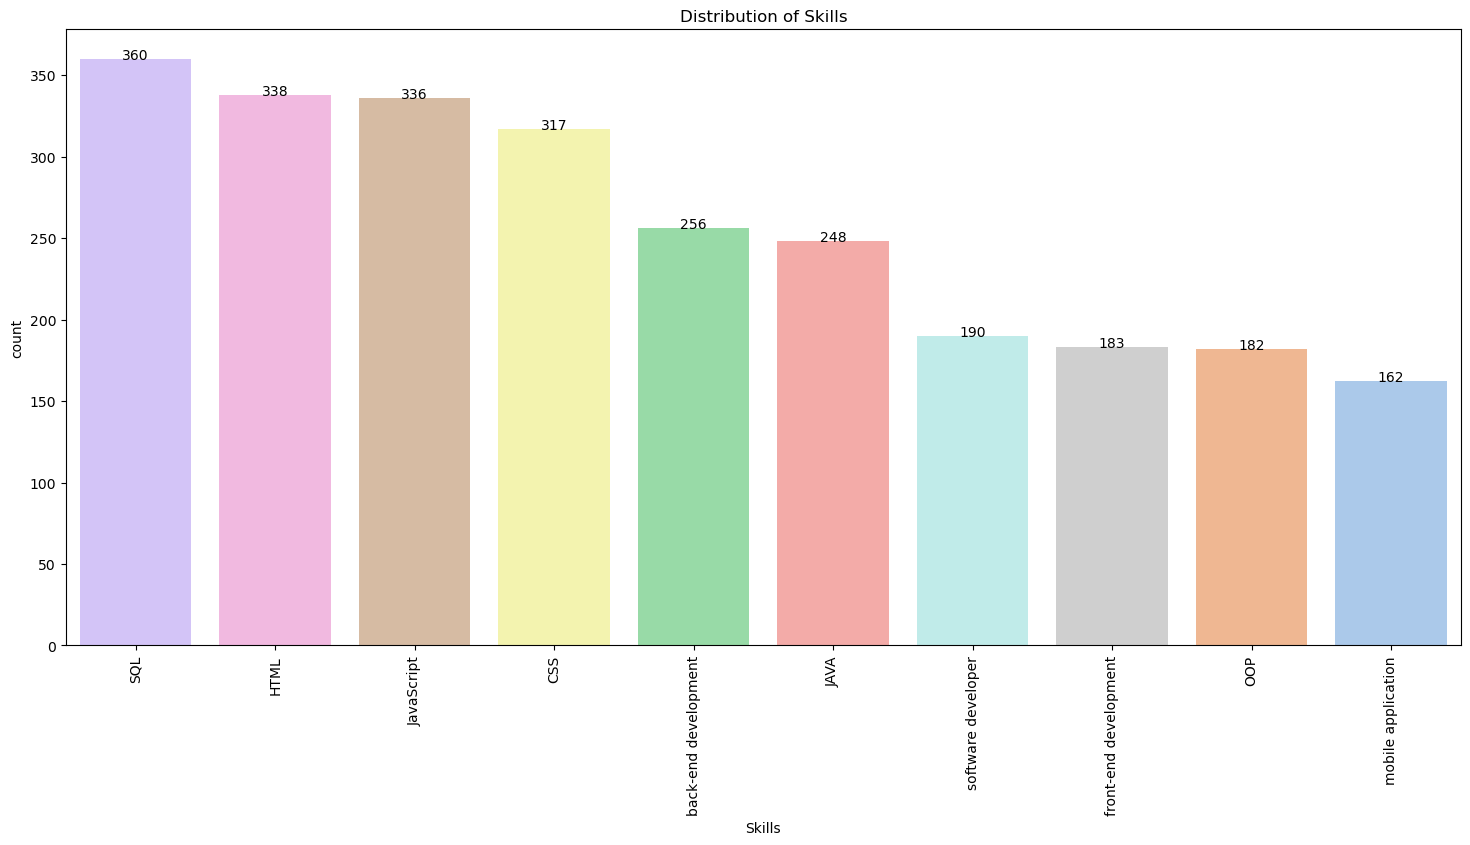

In [109]:
top_10_skills = df_extended['Skills'].value_counts().drop(skills_to_remove).head(10)
df_clean_filtered = df_extended[df_extended['Skills'].isin(top_10_skills.index)]

plt.xticks(rotation=90)
show_countplot(df_clean_filtered,"Skills",10)

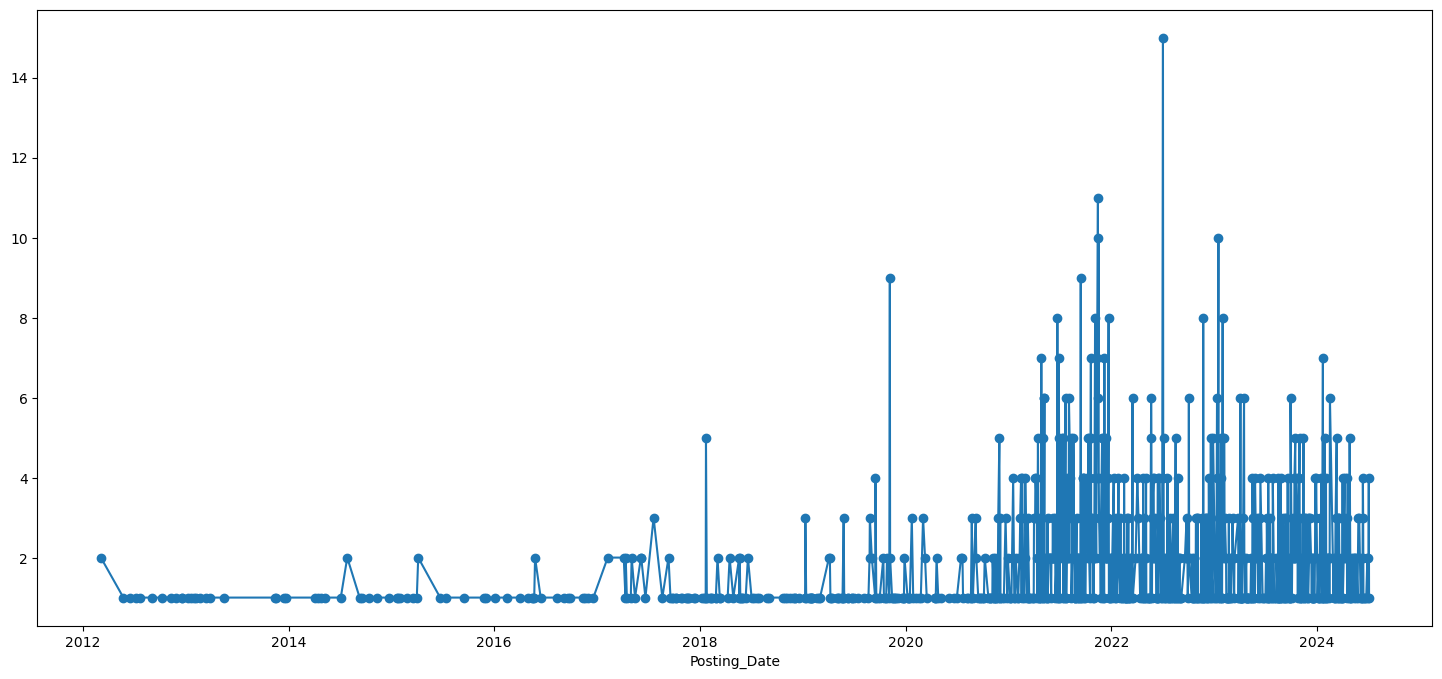

In [117]:
df_grouped = df_clean.groupby("Posting_Date").size().reset_index(name='Count')
show_plot(df_grouped,"Posting_Date","Count")

In [112]:
id_max = df_grouped["Count"].idxmax()
df_grouped.iloc[id_max]

df_clean[df_clean["Posting_Date"]==df_grouped.iloc[id_max]["Posting_Date"]]

,Name,Url_to_Vacancy,Company,Location,Type_of_Employment,Age_category,Education_degree,Salary,Posting_Date,Deadline_Date,Skills,Month,Year
755,Senior Penetration Tester,https://busy.az/vacancy/84343/senior-penetrati...,Cyberpoint,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2022-07-03,2022-08-03,"software development, proqramlaşdırma, proqram...",7.0,2022.0
756,Biznes analitika üzrə Baş mütəxəssis (Proqram ...,https://busy.az/vacancy/84340/biznes-analitika...,ABB ASC,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2022-07-03,2022-08-03,"software development, programming, proqram təm...",7.0,2022.0
757,Android proqramçı,https://busy.az/vacancy/84339/android-proqramci,ABB ASC,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2022-07-03,2022-08-03,"software development, programming, proqram təm...",7.0,2022.0
758,Fullstack Seni̇or Laravel Proqramçı,https://busy.az/vacancy/84337/fullstack-senior...,Innovative Business Products,Bakı,Tam ştat (full time),NaN,NaN,4000 - 5000,2022-07-03,2022-08-03,"software development, programming, proqram təm...",7.0,2022.0
759,Proqram təminatının testləşdirilməsi üzrə mühə...,https://busy.az/vacancy/84300/proqram-teminati...,ABB ASC,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2022-07-03,2022-08-03,"Oracle, Mysql, proqramlaşdırma, proqram təmina...",7.0,2022.0
760,Flutter Developer,https://busy.az/vacancy/84282/flutter-developer,GTSolutions,Bakı,Tam ştat (full time),NaN,NaN,800 - 1200,2022-07-03,2022-08-03,"software development, programming, proqram təm...",7.0,2022.0
761,Senior Software Engineer (Java),https://busy.az/vacancy/84281/senior-software-...,Digital Umbrella,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2022-07-03,2022-08-03,"software development, programming, proqram təm...",7.0,2022.0
762,Avtomatlaşdırılmış əməliyyat sistemi üzrə proq...,https://busy.az/vacancy/84278/avtomatlasdirilm...,ABB ASC,Bakı,Tam ştat (full time),NaN,Ali,Razılaşma yolu ilə,2022-07-03,2022-08-03,"SQL, JavaScript, OOP, software development, pr...",7.0,2022.0
763,Front-end üzrə proqramçı (Rəqəmsal İnnovasiyal...,https://busy.az/vacancy/84274/front-end-uzre-p...,ABB ASC,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2022-07-03,2022-08-03,"software development, programming, proqram təm...",7.0,2022.0
764,Vue.js Developer,https://busy.az/vacancy/84272/vuejs-developer,Digital Umbrella,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2022-07-03,2022-08-03,"software development, programming, proqram təm...",7.0,2022.0


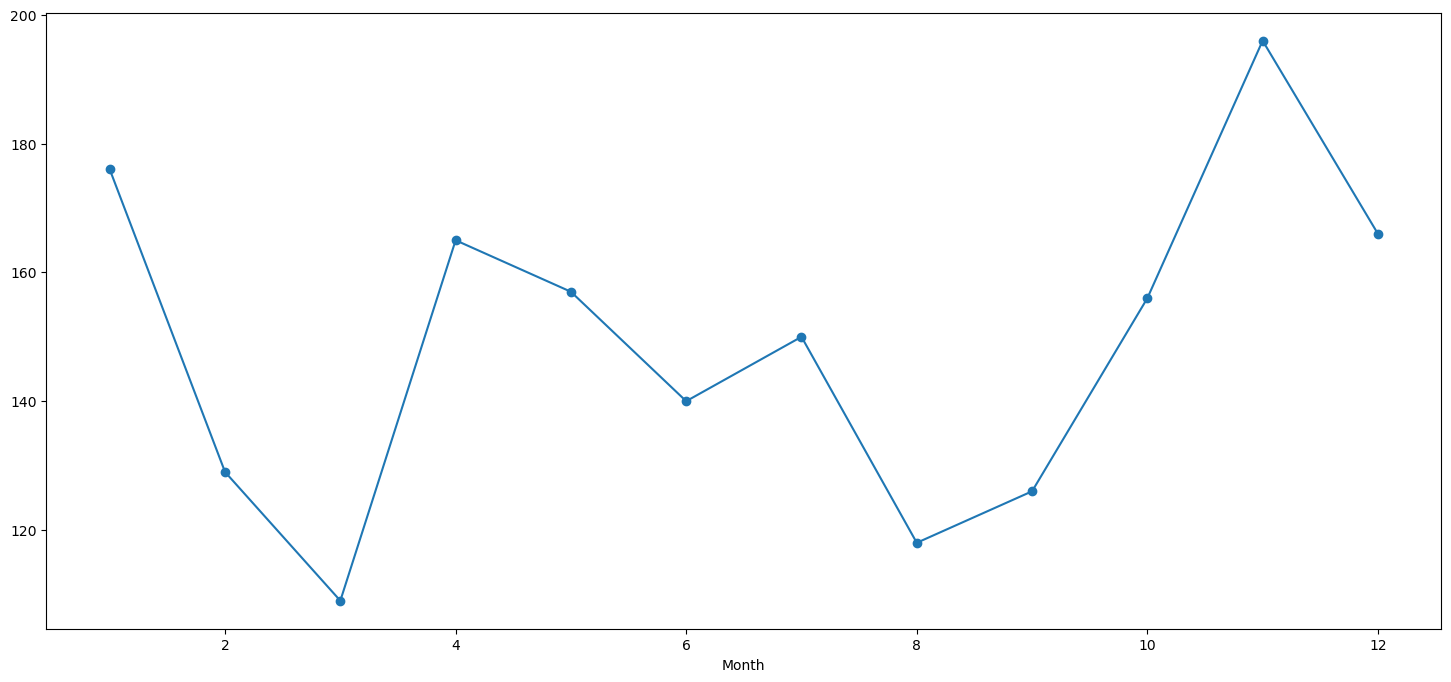

In [118]:
df_grouped = df_clean.groupby("Month").size().reset_index(name='Count')
show_plot(df_grouped,"Month","Count")

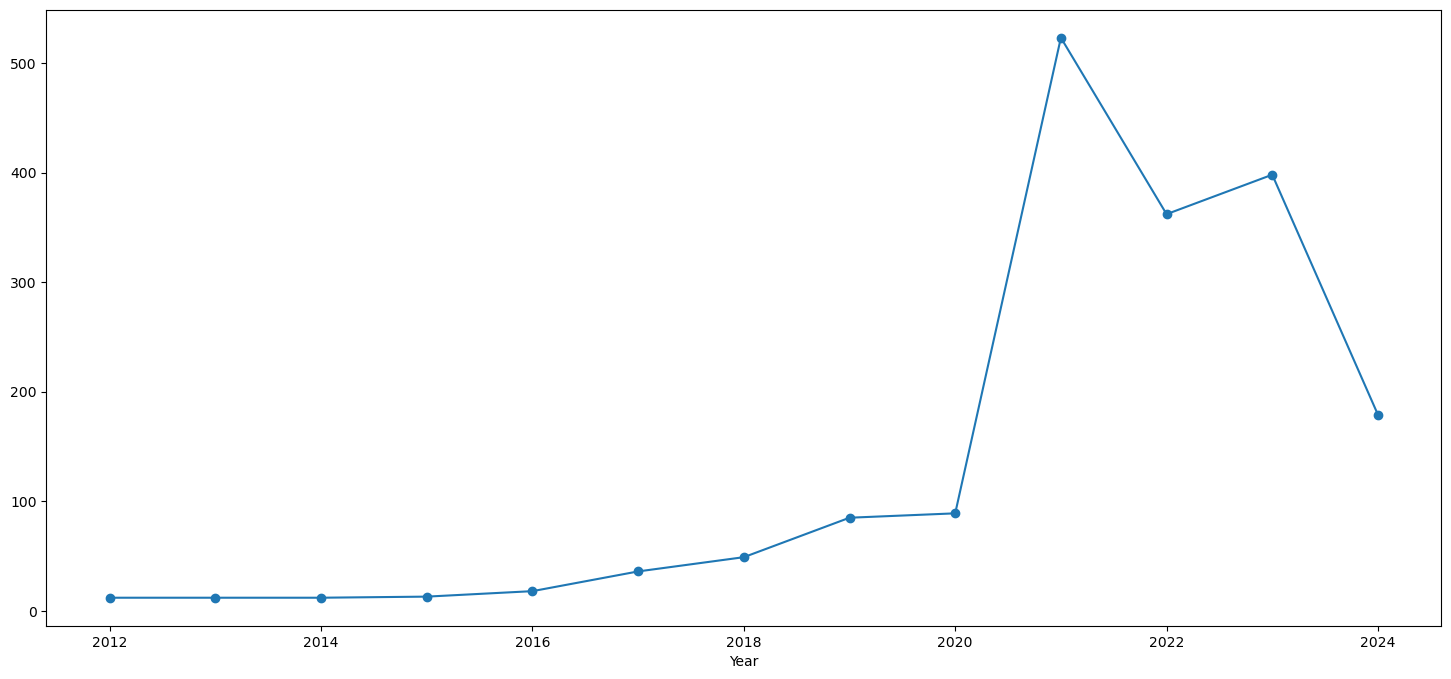

In [119]:
df_grouped = df_clean.groupby("Year").size().reset_index(name='Count')
show_plot(df_grouped,"Year","Count")